In [1]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8,  #количество кластеров
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300 #максимальное количество итераций
                )

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

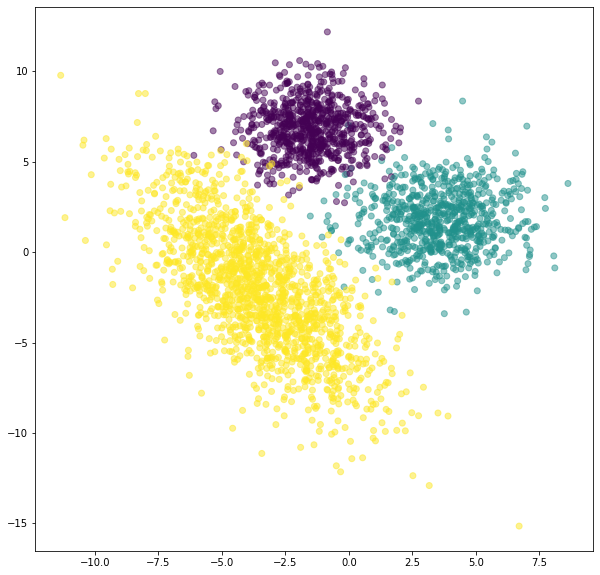

In [3]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [4]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

In [5]:
import sys
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
# k_means.cluster_centers_
# k_means.labels_
np.set_printoptions(threshold=100)#sys.maxsize)
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_12551/861540162.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.round(k_means.cluster_centers_).astype(np.int))


In [6]:
import numpy as np
a = [0.4, 0.6, 1.7]
print(np.round(a).astype(np.int))

[0 1 2]


/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_12551/1413804771.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.round(a).astype(np.int))


In [7]:
a = [0, 0, 0, 1, 1, 2]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')
# Вывод
# 3 2 1

3 2 1 

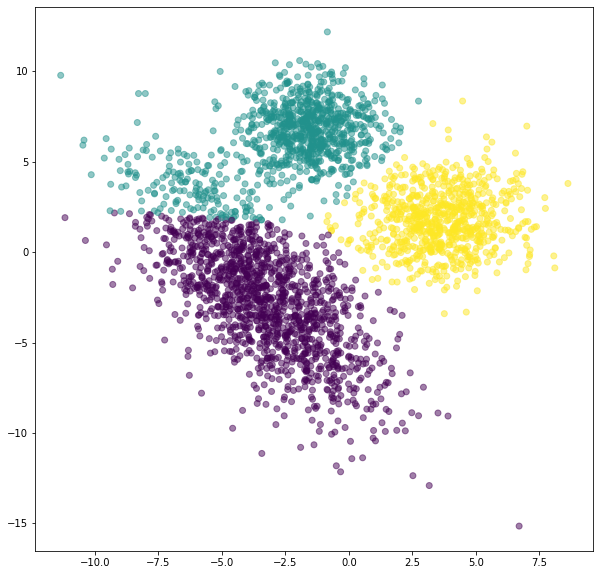

In [8]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [9]:
_, counts = np.unique(k_means_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

1321 938 741 

In [4]:
import pandas as pd
dataset = pd.read_csv('./snsdata.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [5]:
df = dataset.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [31]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df)
k_means = KMeans(n_clusters=9, random_state=123)

k_means.fit(X)
k_means_pred = k_means.labels_.astype(np.int)

/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_26018/1282344784.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k_means_pred = k_means.labels_.astype(np.int)


In [32]:
_, counts = np.unique(k_means_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

20345 764 424 1 932 644 830 1026 5034 

In [33]:
clusters = k_means.labels_
df['cluster'] = clusters
# np.set_printoptions(threshold=sys.maxsize)
# print(df.groupby(['cluster']).sum())
print(df.groupby(['cluster']).sum().to_string())

         basketball  football  soccer  softball  volleyball  swimming  cheerleading  baseball  tennis  sports  cute   sex  sexy   hot  kissed  dance  band  marching  music  rock   god  church  jesus  bible  hair  dress  blonde  mall  shopping  clothes  hollister  abercrombie   die  death  drunk  drugs
cluster                                                                                                                                                                                                                                                                                                       
0              3271      3216    2800      1088        1174      1587           551      1408    1161    1844  3027  1937  1651  1077     665   4340  3138        38  10996  2994  6355    2535   1366     82  3672    751     815  2305      3400     1012        294          191  2435   1565   1028    412
1               135       209     117        90          54       119            28        

In [28]:
for k, group in df.groupby('cluster'):
    print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)

0
music         0.540477
god           0.312362
dance         0.213320
hair          0.180487
shopping      0.167117
basketball    0.160777
football      0.158073
band          0.154239
cute          0.148783
rock          0.147161
dtype: float64
1
god           4.742925
jesus         2.018868
church        1.740566
bible         1.108491
music         1.084906
hair          0.459906
band          0.410377
dance         0.389151
die           0.360849
basketball    0.351415
dtype: float64
2
hollister      1.522892
abercrombie    1.168675
shopping       0.920482
hair           0.913253
music          0.906024
dance          0.693976
mall           0.669880
cute           0.610843
god            0.457831
clothes        0.415663
dtype: float64
3
blonde      327.0
sex          22.0
hair         12.0
god          10.0
drunk         6.0
death         6.0
die           6.0
football      2.0
dress         2.0
rock          1.0
dtype: float64
4
softball      2.548733
volleyball    1.967836
bask

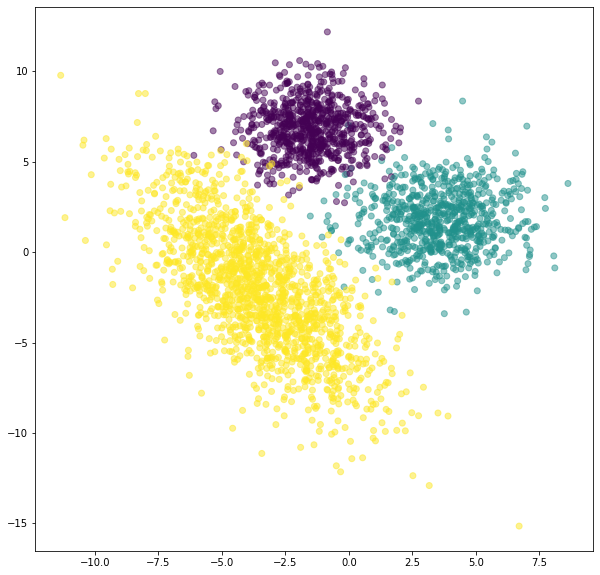

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [36]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, 
                        max_iter=100,
                        random_state=42,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

gm.fit(X)
y_pred = gm.predict(X)
gm.means_

array([[-2.21861264, -4.15574239],
       [ 1.01124148,  4.31664695],
       [-4.94579669,  0.04257022]])

In [38]:
import numpy as np
print(np.round(gm.means_).astype(np.int))

[[-2 -4]
 [ 1  4]
 [-5  0]]


/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_26018/1039562619.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.round(gm.means_).astype(np.int))


In [40]:
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

788 1510 702 

In [44]:
import pandas as pd
import numpy as np
df = pd.read_csv("./snsdata.csv")
X = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=9, random_state=123)
y_pred = gm.fit_predict(X_transformed)
print(y_pred[7])
gm.n_iter_

3


30

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131660482634046

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler


# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X)
kmeans_pred = kmeans.labels_
# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

0.804474693112785

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))


# K-means
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

kmeans.fit(X_transformed)
kmeans_pred = kmeans.labels_

round(homogeneity_score(labels_true=y, labels_pred=kmeans_pred), 2)

0.8

In [14]:
# EM-алгоритм 
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
gm = GaussianMixture(n_components=3, random_state=42)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

gm.fit(X_transformed)
gm_pred = gm.predict(X_transformed)

round(homogeneity_score(labels_true=y, labels_pred=gm_pred), 2)

0.93

In [15]:
# Агломеративная кластеризация
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import homogeneity_score

ac = AgglomerativeClustering(n_clusters=3)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

ac.fit(X_transformed)
ac_pred = ac.labels_

round(homogeneity_score(labels_true=y, labels_pred=ac_pred), 2)

0.91

In [16]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import homogeneity_score

dbscan = DBSCAN(eps=0.9, min_samples=35)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

dbscan.fit(X_transformed)
dbscan_pred = dbscan.labels_

round(homogeneity_score(labels_true=y, labels_pred=dbscan_pred), 2)

0.0

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
completeness_score(labels_true=y, labels_pred=kmeans_pred)

0.7859676398774584

In [20]:
# EM-алгоритм 
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
gm = GaussianMixture(n_components=3, random_state=42)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

gm.fit(X_transformed)
gm_pred = gm.predict(X_transformed)

round(completeness_score(labels_true=y, labels_pred=gm_pred), 2)

0.93

In [21]:
# Агломеративная кластеризация
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import completeness_score

ac = AgglomerativeClustering(n_clusters=3)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

ac.fit(X_transformed)
ac_pred = ac.labels_

round(completeness_score(labels_true=y, labels_pred=ac_pred), 2)

0.91

In [22]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import completeness_score

dbscan = DBSCAN(eps=0.9, min_samples=35)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

dbscan.fit(X_transformed)
dbscan_pred = dbscan.labels_

round(completeness_score(labels_true=y, labels_pred=dbscan_pred), 2)

0.08

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.7972774344500205

In [24]:
# EM-алгоритм 
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
gm = GaussianMixture(n_components=3, random_state=42)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

gm.fit(X_transformed)
gm_pred = gm.predict(X_transformed)

round(completeness_score(labels_true=y, labels_pred=gm_pred), 2)

0.93

In [25]:
# Агломеративная кластеризация
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

ac = AgglomerativeClustering(n_clusters=3)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

ac.fit(X_transformed)
ac_pred = ac.labels_

round(v_measure_score(labels_true=y, labels_pred=ac_pred), 2)

0.91

In [26]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

dbscan = DBSCAN(eps=0.9, min_samples=35)

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

dbscan.fit(X_transformed)
dbscan_pred = dbscan.labels_

round(v_measure_score(labels_true=y, labels_pred=dbscan_pred), 2)

0.0

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.5990620007488798

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.7881303880112289

In [31]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch_pred)

0.7802036540872134

In [32]:
kmeans = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.5990620007488798

In [37]:
# Агломеративная кластеризация
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

ac = AgglomerativeClustering(n_clusters=3)
ac1 = AgglomerativeClustering(n_clusters=3, linkage='complete')
ac2 = AgglomerativeClustering(n_clusters=3, linkage='average')
ac3 = AgglomerativeClustering(n_clusters=3, linkage='single')

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

ac.fit(X_transformed)
ac1.fit(X_transformed)
ac2.fit(X_transformed)
ac3.fit(X_transformed)
ac_pred = ac.labels_

round(v_measure_score(labels_true=y, labels_pred=ac_pred), 2)

0.91

In [49]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3)
ac1 = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
ac.fit(X_transformed)
ac1.fit(X_transformed)
ac_pred = ac.labels_
round(v_measure_score(labels_true=y, labels_pred=ac_pred), 2)


0.91

In [53]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

# dbscan = DBSCAN(eps=0.8, min_samples=35) # 0.71
dbscan = DBSCAN(eps=0.9, min_samples=35) # 0.77

dbscan.fit(X)
dbscan_pred = dbscan.labels_

round(v_measure_score(labels_true=y, labels_pred=dbscan_pred), 2)

0.77

In [54]:
dbscan = DBSCAN(eps=0.9, min_samples=35) # 0.77

labels = dbscan.fit_predict(X)
not_noise_ind = np.where(labels != -1)
v_measure = v_measure_score(y[not_noise_ind], labels[not_noise_ind])
np.round(v_measure, 2)

0.97

In [60]:
# Агломеративная кластеризация
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import MinMaxScaler

ac = AgglomerativeClustering(n_clusters=3)

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)

ac.fit(X_transformed)
ac_pred = ac.labels_

round(v_measure_score(labels_true=y, labels_pred=ac_pred), 2)

0.89